In [4]:
from numpy import linspace, array, vectorize
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import tanh, linear

In [2]:
model = keras.Sequential()
model.add(Dense(units=3, input_shape=(1,), activation=tanh))
model.add(Dense(units=1, input_shape=(1,), activation=linear))

model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.1))

In [5]:
def target_func_impl(x):
  return x**3-3*x+2
target_func = vectorize(target_func_impl)

In [26]:
x_train1 = linspace(-2, 0.5)
y_train1 = target_func(x_train1)
x_train2 = linspace(1, 2)
y_train2 = target_func(x_train2)
x_train = array(list(x_train1)+list(x_train2))
y_train = array(list(y_train1)+list(y_train2))

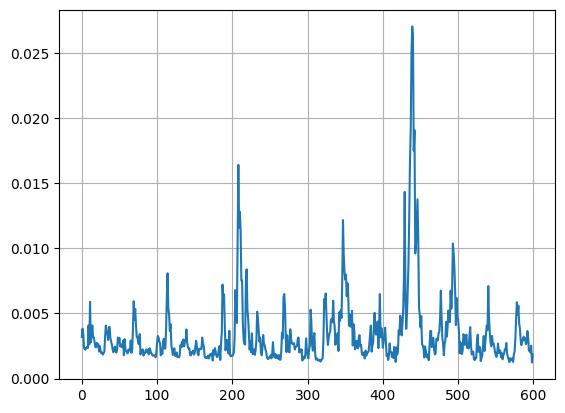

In [32]:
EPOCHS = 600
hist = model.fit(x_train, y_train, epochs=EPOCHS, verbose=False, shuffle=True, validation_split=0.2)
plt.plot(range(0, EPOCHS), hist.history['loss'])
plt.grid(True)
plt.show()

In [33]:
x_test = linspace(-2, 2)
y_test = target_func(x_test)
x_t = linspace(0.5, 1)

2/2 [==============================] - 0s 2ms/step


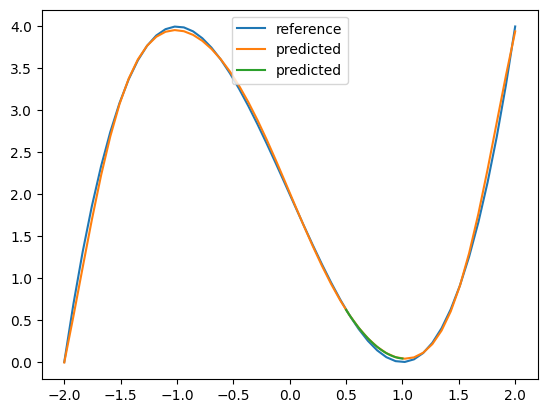

In [34]:
y_prime = model.predict(x_test)
y_t_prime = model.predict(x_t)
plt.plot(x_test, y_test)
plt.plot(x_test, y_prime)
plt.plot(x_t, y_t_prime)
plt.legend(("reference", "predicted", "predicted"))
plt.show()